In [115]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Label mapping
label_mapping = {
    "england": 0,
    "india": 1,
    "usa": 2
}


In [116]:
# Load and preprocess data
def load_data(data_path, label_mapping, image_size=(64, 64)):
    X, y = [], []

    for category, label in label_mapping.items():
        folder_path = os.path.join(data_path, category)
        if not os.path.exists(folder_path):
            print(f"Warning: Folder not found for category '{category}'")
            continue

        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            try:
                img = Image.open(img_path).convert('L')  # Convert to grayscale
                img = img.resize(image_size)  # Resize image
                img_array = np.array(img) / 255.0  # Normalize
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

    X = np.array(X).reshape(-1, image_size[0], image_size[1], 1)
    y = np.array(y)

    return X, y


In [117]:
# Define the MLP model
def create_mlp(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(256, activation='relu'),
        Dropout(0.3),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        BatchNormalization(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model



In [118]:
# Plot confusion matrix heatmap
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()



In [119]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Retrieve accuracy and loss history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)  # Number of training epochs

    # Plot training and validation accuracy
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)  # First plot
    plt.plot(epochs, acc, label='Training Accuracy', color='blue')
    plt.plot(epochs, val_acc, label='Validation Accuracy', color='orange')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)  # Second plot
    plt.plot(epochs, loss, label='Training Loss', color='blue')
    plt.plot(epochs, val_loss, label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


Loading training data...
Loading validation data...
Class distribution (Train): [348 581 976]
Class distribution (Validation): [ 88 146 245]
Calculating class weights...
Class Weights: {0: 1.8247126436781609, 1: 1.0929432013769362, 2: 0.6506147540983607}
Training model...
Epoch 1/30


/Users/xinleichen/miniconda3/envs/myenv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3173 - loss: 1.4309 - val_accuracy: 0.1837 - val_loss: 1.8201 - learning_rate: 0.0010
Epoch 2/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3508 - loss: 1.2513 - val_accuracy: 0.3048 - val_loss: 1.0985 - learning_rate: 0.0010
Epoch 3/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3441 - loss: 1.1825 - val_accuracy: 0.5491 - val_loss: 1.0313 - learning_rate: 0.0010
Epoch 4/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3777 - loss: 1.1218 - val_accuracy: 0.5992 - val_loss: 1.0091 - learning_rate: 0.0010
Epoch 5/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3402 - loss: 1.1566 - val_accuracy: 0.2902 - val_loss: 1.0169 - learning_rate: 0.0010
Epoch 6/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3788 - loss: 1.1152 - val_accuracy: 0.3006 - val_loss: 1.0201 - learning_rate: 0.0010
Epoch 7/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3949 - loss: 1.0768 - val_accurac

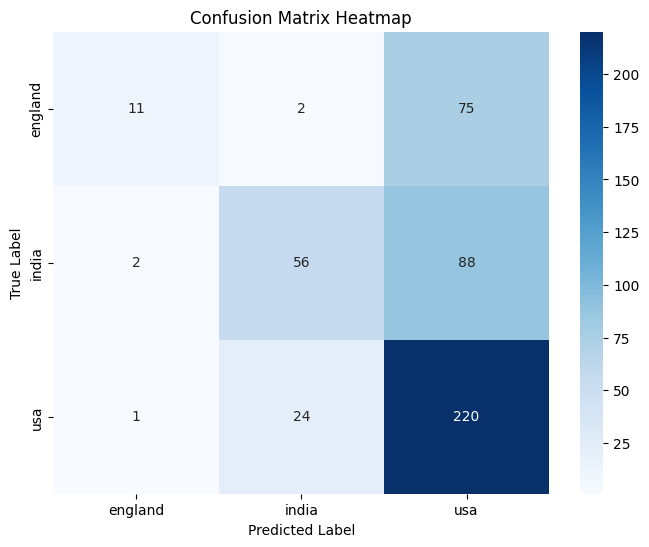

In [120]:
# Main process
if __name__ == "__main__":
    # Data paths
    data_train_path = "./train"  # Training dataset path
    data_val_path = "./val"  # Validation dataset path

    # Load data
    print("Loading training data...")
    X_train, y_train = load_data(data_train_path, label_mapping, image_size=(64, 64))

    print("Loading validation data...")
    X_val, y_val = load_data(data_val_path, label_mapping, image_size=(64, 64))

    # Data inspection
    print("Class distribution (Train):", np.bincount(y_train))
    print("Class distribution (Validation):", np.bincount(y_val))

    # Convert to one-hot labels
    y_train_categorical = to_categorical(y_train, num_classes=len(label_mapping))
    y_val_categorical = to_categorical(y_val, num_classes=len(label_mapping))

    # Create the MLP model
    input_shape = X_train.shape[1:]
    num_classes = len(label_mapping)
    model = create_mlp(input_shape, num_classes)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Calculate class weights
    print("Calculating class weights...")
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
    print("Class Weights:", class_weights_dict)

    # Train the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
    
    print("Training model...")
    history = model.fit(
        X_train, y_train_categorical,
        validation_data=(X_val, y_val_categorical),
        epochs=30,
        batch_size=16,
        class_weight=class_weights_dict,
        callbacks=[early_stopping, lr_scheduler],
        verbose=1
    )

    # Evaluate the model
    print("Evaluating model...")
    val_loss, val_accuracy = model.evaluate(X_val, y_val_categorical, verbose=0)
    print(f"Validation Accuracy: {val_accuracy:.2f}")

    # Generate confusion matrix heatmap
    print("Generating confusion matrix heatmap...")
    y_val_true = np.argmax(y_val_categorical, axis=1)
    y_val_pred = np.argmax(model.predict(X_val), axis=1)
    plot_confusion_matrix(y_val_true, y_val_pred, labels=list(label_mapping.keys()))


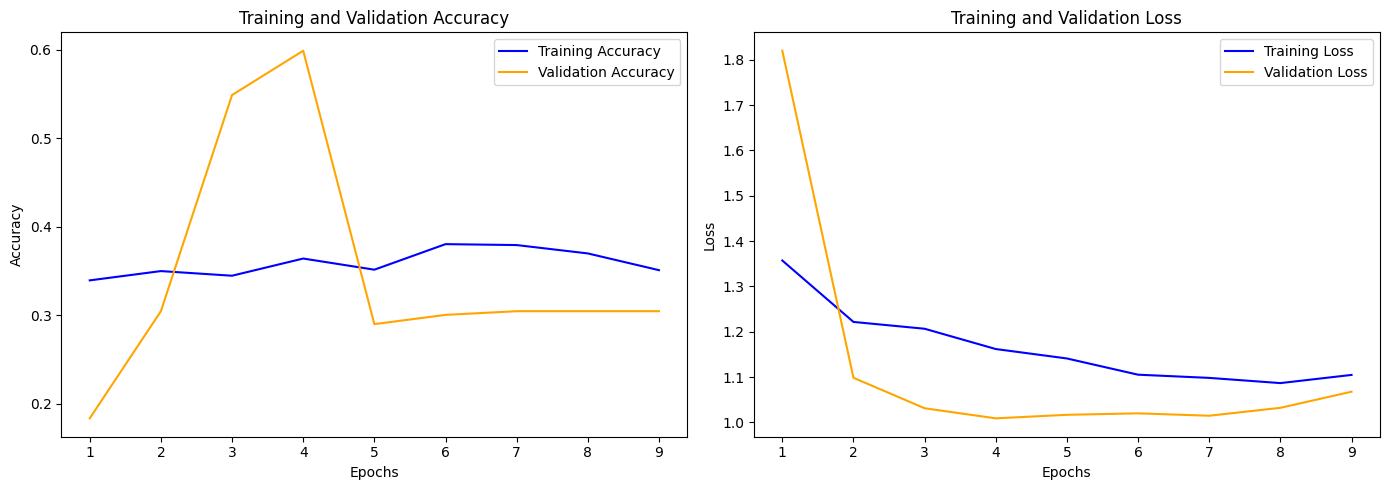

In [121]:
plot_training_history(history)
